# Image Segmentation using C-Means

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen

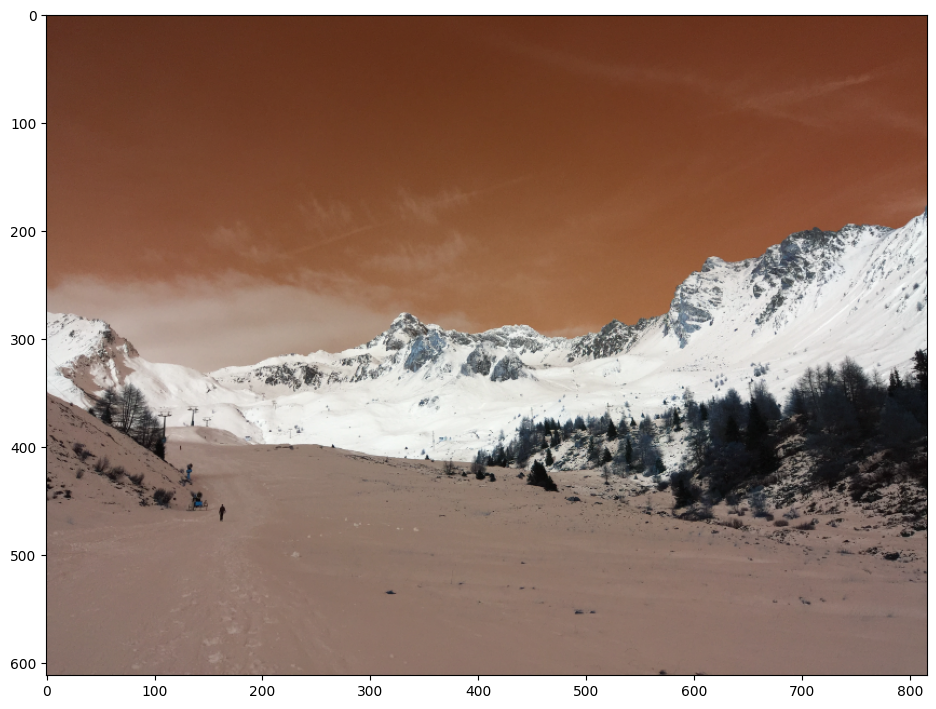

In [27]:
req = urlopen('https://genovese.di.unimi.it/img.bmp')
# req = urlopen('https://genovese.di.unimi.it/mri_1.jpeg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

figure_size = 25
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1), plt.imshow(img)
plt.show()

Next, converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.

We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

In [5]:
vectorized = img.reshape(-1)
vectorized = np.float32(vectorized)

We are going to cluster with k = 3 because if you look at the image above it has 3 colors.

Define criteria, number of clusters(K) and apply k-means()

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

**OpenCV** provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

  Type of termination criteria. It has 3 flags as below:

  cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
  cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
  cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [23]:
K = 7
attempts = 20
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)

label.shape

(1498176, 1)

In [24]:
result_image = label.reshape((img.shape[0],img.shape[1],img.shape[2]))

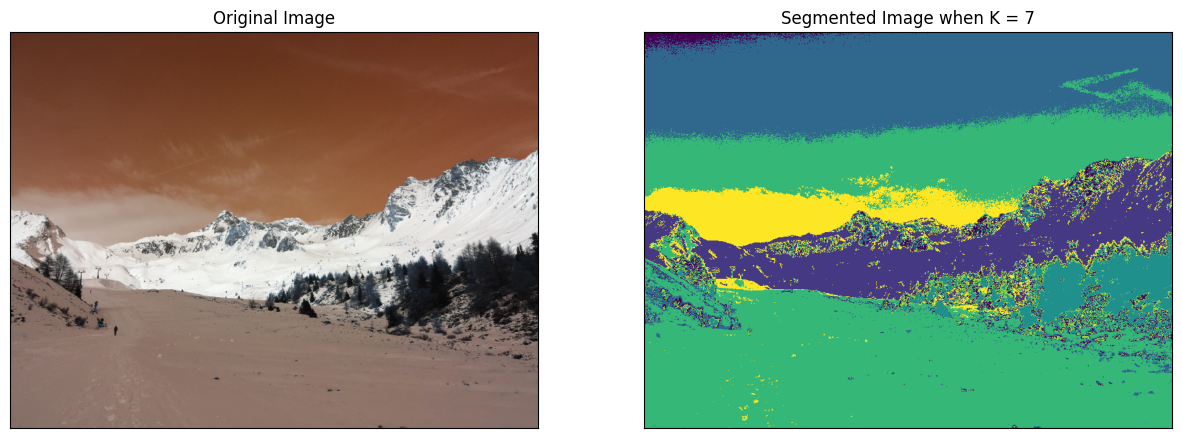

In [25]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result_image[:,:,0])
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()